In [11]:
import networkx as nx
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
#Data downloaded from https://neurodata.io/project/connectomes/

In [3]:
fname='/home/maria/Downloads/c.elegans.herm_pharynx_1.graphml'
graph=nx.read_graphml(fname)

In [4]:
def parse_graph(graph):
    adj_lst={}
    for line in nx.generate_adjlist(graph):
        strp_n=line.replace("n", "")
        lst=strp_n.split(' ')
        int_lst=[]
        for ind in lst:
            int_lst.append(int(ind))
        adj_lst[int_lst[0]]=int_lst[1:]
    return adj_lst

In [5]:
adj_lst=parse_graph(graph)

In [20]:
def adj_lst_to_mat(adj_lst):
    n_nodes=len(adj_lst.keys())
    con_mat=np.zeros((n_nodes,n_nodes))
    for node in adj_lst.keys():
        for adj in adj_lst[node]:
            con_mat[node,adj]=1
    return con_mat

In [21]:
con_mat=adj_lst_to_mat(adj_lst)

In [58]:
def clean_graph(adj_lst,con_mat,initial_condition):
    initial_condition=random.choice(list(adj_lst.keys()))
    n_nodes=len(adj_lst.keys())
    visited_arr=np.zeros((n_nodes,))
    explore(con_mat,initial_condition,visited_arr)
    reachable_nodes=np.nonzero(visited_arr)[0]
    adj_lst_reachable=adj_lst.copy()
    empty_lst=[]
    for key in adj_lst_reachable.keys():
        if adj_lst[key]==[]:
            empty_lst.append(key)
    for empt_key in empty_lst:
        del adj_lst_reachable[key]
        for key in adj_lst.keys():
            for empt in adj_lst[key]:
                if empt==empt_key:
                    adj_lst_reachable[key].remove(empt)
    return adj_lst_reachable
clean_graph(adj_lst,con_mat,0)

{0: [1,
  4,
  12,
  13,
  43,
  54,
  55,
  56,
  57,
  58,
  59,
  67,
  111,
  158,
  168,
  169,
  176,
  178,
  224],
 1: [0, 5, 12, 13, 44, 53, 55, 56, 57, 59, 66, 159, 168, 177, 179, 183, 223],
 2: [0,
  3,
  16,
  53,
  54,
  59,
  69,
  70,
  80,
  82,
  110,
  116,
  122,
  128,
  164,
  171,
  173,
  174,
  175,
  182,
  183,
  186,
  196,
  198,
  210,
  214,
  218,
  229],
 3: [1,
  2,
  22,
  53,
  54,
  58,
  60,
  67,
  68,
  68,
  69,
  83,
  110,
  111,
  129,
  160,
  173,
  174,
  175,
  187,
  203],
 4: [0, 0, 20, 51, 132, 164, 173, 180, 219],
 5: [1, 1, 11, 19, 21, 44, 52, 75, 157, 165, 174, 180, 218, 220, 232],
 6: [7,
  10,
  12,
  13,
  22,
  40,
  43,
  53,
  54,
  55,
  57,
  58,
  58,
  66,
  67,
  74,
  132,
  132,
  178,
  196],
 7: [6, 11, 13, 40, 44, 54, 55, 56, 57, 58, 67, 77, 129, 149, 168, 169],
 8: [9, 12, 17, 18],
 9: [8, 13, 19, 40],
 10: [0, 11, 12, 14, 20, 40, 41, 43, 45, 49, 72, 77, 112, 171, 196],
 11: [1, 5, 7, 10, 13, 21, 40, 42, 46, 73, 73, 

# Run Monte Carlo simulation

In [62]:
np.random.seed(77)
def simulation(adj_lst,con_mat):
    iterations=1000
    initial_condition=random.choice(list(adj_lst.keys()))
    prev=initial_condition
    adj_lst_reachable=clean_graph(adj_lst,con_mat,initial_condition)
    visited_nodes=[]
    for it in range(iterations):
        visited_nodes.append(prev)
        move_to=random.choice(adj_lst_reachable[prev])
        prev=move_to
    return visited_nodes

In [63]:
visited_nodes=simulation(adj_lst,con_mat)

(array([ 1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
         4.,  0.,  0.,  1.,  0.,  1.,  0.,  2.,  0.,  1.,  1.,  0.,  1.,
         0.,  5.,  5.,  6.,  4.,  3.,  3.,  5.,  3.,  6.,  2.,  6.,  4.,
         0.,  0.,  0.,  2.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., 39., 34., 13., 24.,  7.,  6.,  4., 10.,  1.,  1.,  1.,  0.,
         0.,  4.,  2.,  4.,  4.,  7.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
         3.,  1.,  2.,  1.,  2.,  1.,  3.,  1.,  7., 14., 11.,  4.,  4.,
         1.,  0.,  1.,  2.,  4.,  2.,  2.,  8.,  1.,  2.,  5., 32., 31.,
        16., 14.,  1.,  2.,  5., 11.,  3.,  2.,  0.,  5.,  1.,  1.,  0.,
         1.,  1.,  3.,  0.,  0.,  0.,  1.,  0.,  1.,  3.,  2.,  0.,  1.,
         2.,  5.,  5.,  2.,  3.,  1.,  1.,  3.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  1.,  7., 12.,  0.,  0.,  1.,  6.,  2.,
         9., 13.,  0.,  1.,  1.,  2.,  1.,  1.,  9.,  9.,  7., 11.,  2.,
         0.,  2.,  1.,  0.,  8.,  5.,  4.,  3.,  5.

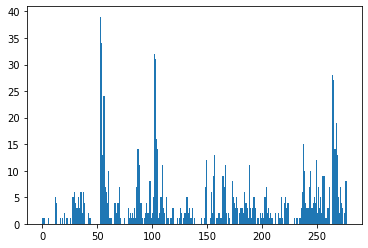

In [65]:
plt.hist(visited_nodes,bins=278)
plt.title('Histogram of neur')